이 자료는 위키독스 딥 러닝을 이용한 자연어 처리 입문의 코사인 유사도 튜토리얼 자료입니다.  

링크 : https://wikidocs.net/24603

# **05. 벡터의 유사도(Vector Similarity)**
문장이나 문서의 유사도를 구하는 작업은 자연어 처리의 주요 주제 중 하나입니다. 사람들이 인식하는 문서의 유사도는 주로 문서들 간에 동일한 단어 또는 비슷한 단어가 얼마나 공통적으로 많이 사용되었는지에 의존합니다. 기계도 마찬가지입니다. 기계가 계산하는 문서의 유사도의 성능은 각 문서의 단어들을 어떤 방법으로 수치화하여 표현했는지(DTM, Word2Vec 등), 문서 간의 단어들의 차이를 어떤 방법(유클리드 거리, 코사인 유사도 등)으로 계산했는지에 달려있습니다.

## **05-01 코사인 유사도(Cosine Similarity)**

BoW에 기반한 단어 표현 방법인 DTM, TF-IDF, 또는 뒤에서 배우게 될 Word2Vec 등과 같이 단어를 수치화할 수 있는 방법을 이해했다면 이러한 표현 방법에 대해서 코사인 유사도를 이용하여 문서의 유사도를 구하는 게 가능합니다.

---
### **1. 코사인 유사도(Cosine Similarity)**

코사인 유사도는 두 벡터 간의 코사인 각도를 이용하여 구할 수 있는 두 벡터의 유사도를 의미합니다. 두 벡터의 방향이 완전히 동일한 경우에는 1의 값을 가지며, 90°의 각을 이루면 0, 180°로 반대의 방향을 가지면 -1의 값을 갖게 됩니다. 즉, 결국 코사인 유사도는 -1 이상 1 이하의 값을 가지며 값이 1에 가까울수록 유사도가 높다고 판단할 수 있습니다. 이를 직관적으로 이해하면 두 벡터가 가리키는 방향이 얼마나 유사한가를 의미합니다.

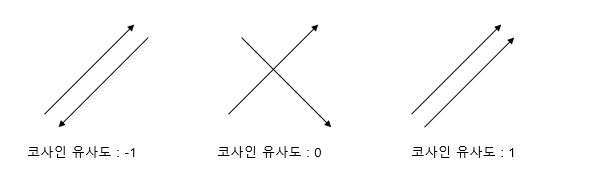

두 벡터 A, B에 대해서 코사인 유사도는 식으로 표현하면 다음과 같습니다.

$$similarity=cos(Θ)=\frac{A⋅B}{||A||\ ||B||}=\frac{\sum_{i=1}^{n}{A_{i}×B_{i}}}{\sqrt{\sum_{i=1}^{n}(A_{i})^2}×\sqrt{\sum_{i=1}^{n}(B_{i})^2}}$$

문서 단어 행렬이나 TF-IDF 행렬을 통해서 문서의 유사도를 구하는 경우에는 문서 단어 행렬이나 TF-IDF 행렬이 각각의 특징 벡터 A, B가 됩니다. 예시를 통해 문서 단어 행렬에 대해서 코사인 유사도를 구해봅시다.  
  
문서1 : 저는 사과 좋아요  
문서2 : 저는 바나나 좋아요  
문서3 : 저는 바나나 좋아요 저는 바나나 좋아요  
  
뛰어쓰기 기준 토큰화를 진행했다고 가정하고, 위의 세 문서에 대해서 문서 단어 행렬을 만들면 이와 같습니다.

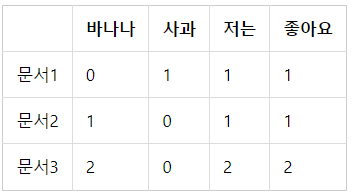

Numpy를 사용해서 코사인 유사도를 계산하는 함수를 구현하고 각 문서 벡터 간의 코사인 유사도를 계산해보겠습니다.

In [1]:
from numpy import dot          # 내적
from numpy.linalg import norm  # 피타고라스 정리로 구하는 두 벡터(점)간의 거리
import numpy as np

In [2]:
def cos_sim(A, B):
    return dot(A, B) / (norm(A) * norm(B))

In [3]:
doc1 = np.array([0, 1, 1 ,1])
doc2 = np.array([1, 0, 1, 1])
doc3 = np.array([2, 0, 2, 2])

In [4]:
print('문서 1과 문서2의 유사도 :', cos_sim(doc1, doc2))
print('문서 1과 문서3의 유사도 :', cos_sim(doc1, doc3))
print('문서 2와 문서3의 유사도 :', cos_sim(doc2, doc3))

문서 1과 문서2의 유사도 : 0.6666666666666667
문서 1과 문서3의 유사도 : 0.6666666666666667
문서 2와 문서3의 유사도 : 1.0000000000000002


눈여겨볼만한 점은 문서1과 문서2의 코사인 유사도와 문서1과 문서3의 코사인 유사도가 같다는 점과 문서2와 문서3의 코사인 유사도가 1이 나온다는 것입니다. 앞서 1은 두 벡터의 방향이 완전히 동일한 경우에 1이 나오며, 코사인 유사도 관점에서는 유사도의 값이 최대임을 의미한다고 언급한 바 있습니다.

문서3은 문서2에서 단지 모든 단어의 빈도수가 1씩 증가했을 뿐입니다. 다시 말해 한 문서 내의 모든 단어의 빈도수가 동일하게 증가하는 경우에는 기존의 문서와 코사인 유사도의 값이 1이라는 것입니다. 이것이 시사하는 점은 무엇일까요? 예를 들어보겠습니다. 문서 A와 B가 동일한 주제의 문서. 문서 C는 다른 주제의 문서라고 해봅시다. 그리고 문서 A와 문서 C의 문서의 길이는 거의 차이가 나지 않지만, 문서 B의 경우 문서 A의 길이보다 두 배의 길이를 가진다고 가정하겠습니다. 이런 경우 유클리드 거리로 유사도를 연산하면 문서 A가 문서 B보다 문서 C와 유사도가 더 높게 나오는 상황이 발생할 수 있습니다. 이는 유사도 연산에 문서의 길이가 영향을 받았기 때문인데, 이런 경우 코사인 유사도가 해결책이 될 수 있습니다. 코사인 유사도는 유사도를 구할 때 벡터의 방향(패턴)에 초점을 두므로 코사인 유사도는 문서의 길이가 다른 상황에서 비교적 공정한 비교를 할 수 있도록 도와줍니다.

---
### **2. 유사도를 이용한 추천 시스템 구현하기**

캐글에서 사용되었던 영화 데이터셋을 가지고 영화 추천 시스템을 만들어보겠습니다. TF-IDF와 코사인 유사도만으로 영화의 줄거리에 기반해서 영화를 추천하는 추천 시스템을 만들 수 있습니다.

다운로드 링크 : https://www.kaggle.com/rounakbanik/the-movies-dataset

원본 파일은 위 링크에서 movies_metadata.csv 파일을 다운로드 받으면 됩니다. 해당 데이터는 총 24개의 열을 가진 45,466개의 샘플로 구성된 영화 정보 데이터입니다.

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
# !pip install kagglehub

In [7]:
## 데이터 다운로드
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rounakbanik/the-movies-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\dlwlg\.cache\kagglehub\datasets\rounakbanik\the-movies-dataset\versions\7


In [8]:
data = pd.read_csv('dataset/movies_metadata.csv', encoding='utf-8', low_memory=False,
                   encoding_errors='ignore')
data

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FALSE,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FALSE,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45450,FALSE,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خ?اب,Rising and falling between a man and woman.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45451,FALSE,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45452,FALSE,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45453,FALSE,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(data.overview[0])

Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.


다운로드 받은 훈련 데이터에서 상위 2개의 샘플만 출력하여 데이터의 형식을 확인합니다.  
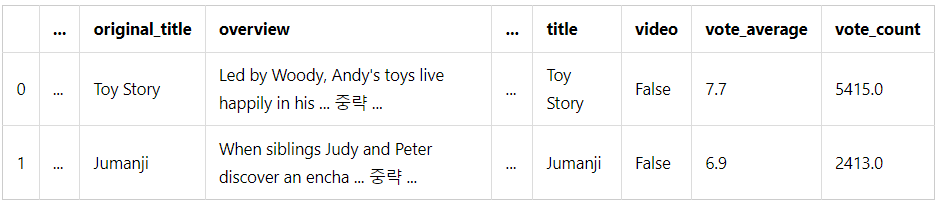

훈련 데이터는 총 24개의 열을 갖고있으나 책의 지면의 한계로 일부 생략합니다. 여기서 코사인 유사도에 사용할 데이터는 영화 제목에 해당하는 title 열과 줄거리에 해당하는 overview 열입니다. 좋아하는 영화를 입력하면, 해당 영화의 줄거리와 유사한 줄거리의 영화를 찾아서 추천하는 시스템을 만들 것입니다.

In [10]:
## 상위 2만개의 샘플만 data 변수에 저장
# data = data.head(20000)
# data

In [11]:
print(data.overview)   

0        Led by Woody, Andy's toys live happily in his ...
1        When siblings Judy and Peter discover an encha...
2        A family wedding reignites the ancient feud be...
3        Cheated on, mistreated and stepped on, the wom...
4        Just when George Banks has recovered from his ...
                               ...                        
45450          Rising and falling between a man and woman.
45451    An artist struggles to finish his work while a...
45452    When one of her hits goes wrong, a professiona...
45453    In a small town live two brothers, one a minis...
45454    50 years after decriminalisation of homosexual...
Name: overview, Length: 45455, dtype: object


만약 훈련 데이터의 양을 줄이고 학습을 진행하고자 한다면 위와 같이 데이터를 줄여서 재저장할 수 있습니다. 여기서는 상위 20,000개의 샘플만 사용하겠습니다. TF-IDF를 연산할 때 데이터에 Null 값이 들어있으면 에러가 발생합니다. TF-IDF의 대상이 되는 data의 overview 열에 결측값에 해당하는 Null 값이 있는지 확인합니다.

In [12]:
# overview 열에 존재하는 모든 결측값을 전부 카운트하여 출력
print('overview 열의 결측값의 수:', data['overview'].isnull().sum())

overview 열의 결측값의 수: 953


135개의 Null 값이 있다고 합니다. 이 경우 결측값을 가진 행을 제거하는 pandas의 dropna()나 결측값이 있던 행에 특정값으로 채워넣는 pandas의 fillna()를 사용할 수 있습니다. 괄호 안에 Null 대신 넣고자하는 값을 넣으면 되는데, 여기서는 빈 값(empty value)으로 대체하였습니다.

In [13]:
# 결측값을 빈 값으로 대체
data['overview'] = data['overview'].fillna('')

Null 값을 빈 값으로 대체하였습니다. overview열에 대해서 TF-IDF 행렬을 구한 후 행렬의 크기를 출력해봅시다.

In [14]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['overview'])
tfidf_matrix.shape, tfidf_matrix

((45455, 75279),
 <45455x75279 sparse matrix of type '<class 'numpy.float64'>'
 	with 1186243 stored elements in Compressed Sparse Row format>)

In [15]:
tfidf_arr = tfidf_matrix.toarray()
tfidf_arr   # tfidf 행렬 (20000개의 리뷰 문서, 단어사전 크기 : 47143)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
tfidf.vocabulary_  # 단어 사전

{'led': 38087,
 'woody': 73096,
 'andy': 3475,
 'toys': 67554,
 'live': 39009,
 'happily': 28884,
 'room': 56720,
 'birthday': 7759,
 'brings': 9347,
 'buzz': 10130,
 'lightyear': 38690,
 'scene': 58387,
 'afraid': 2182,
 'losing': 39420,
 'place': 50798,
 'heart': 29389,
 'plots': 50990,
 'circumstances': 12736,
 'separate': 59319,
 'owner': 48458,
 'duo': 19858,
 'eventually': 22087,
 'learns': 38029,
 'aside': 4688,
 'differences': 17988,
 'siblings': 60506,
 'judy': 34736,
 'peter': 50109,
 'discover': 18342,
 'enchanted': 21121,
 'board': 8229,
 'game': 25689,
 'opens': 47673,
 'door': 19136,
 'magical': 40216,
 'world': 73159,
 'unwittingly': 69776,
 'invite': 33273,
 'alan': 2589,
 'adult': 2014,
 'trapped': 67799,
 'inside': 32753,
 '26': 714,
 'years': 73642,
 'living': 39028,
 'hope': 30641,
 'freedom': 24929,
 'finish': 23767,
 'proves': 52643,
 'risky': 56260,
 'running': 57147,
 'giant': 26502,
 'rhinoceroses': 55968,
 'evil': 22129,
 'monkeys': 43956,
 'terrifying': 66189

TF-IDF 행렬의 크기는 20,000의 행을 가지고 47,847의 열을 가지는 행렬입니다. 다시 말해 20,000개의 영화를 표현하기 위해서 총 47,487개의 단어가 사용되었음을 의미합니다. 또는 47,847차원의 문서 벡터가 20,000개가 존재한다고도 표현할 수 있을 겁니다. 이제 20,000개의 문서 벡터에 대해서 상호 간의 코사인 유사도를 구합니다.

In [17]:
## 자기 자신(matrix)와의 코사인 유사도 계산
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

(45455, 45455)

In [18]:
cosine_sim   # 20000개 문서간의 유사도 Matrix

array([[1.        , 0.01501294, 0.        , ..., 0.        , 0.00597795,
        0.        ],
       [0.01501294, 1.        , 0.04701831, ..., 0.        , 0.02205975,
        0.00940165],
       [0.        , 0.04701831, 1.        , ..., 0.        , 0.01409506,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.00597795, 0.02205975, 0.01409506, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.00940165, 0.        , ..., 0.        , 0.        ,
        1.        ]])

코사인 유사도 연산 결과로는 20,000행 20,000열의 행렬을 얻습니다. 이는 20,000개의 각 문서 벡터(영화 줄거리 벡터)와 자기 자신을 포함한 20,000개의 문서 벡터 간의 유사도가 기록된 행렬입니다. **모든 20,000개 영화의 상호 유사도** 가 기록되어져 있습니다. 이제 기존 데이터프레임으로부터 영화의 타이틀을 key, 영화의 인덱스를 value로 하는 딕셔너리 title_to_index를 만들어둡니다.

In [19]:
title_to_index = dict(zip(data['title'], data.index))

# 영화 제목 Father of the Bride Part II의 인덱스를 리턴
idx = title_to_index['Father of the Bride Part II']
print(idx)

4


In [20]:
title_to_index

{'Toy Story': 0,
 'Jumanji': 1,
 'Grumpier Old Men': 2,
 'Waiting to Exhale': 3,
 'Father of the Bride Part II': 4,
 'Heat': 29038,
 'Sabrina': 888,
 'Tom and Huck': 7,
 'Sudden Death': 8,
 'GoldenEye': 9,
 'The American President': 10,
 'Dracula: Dead and Loving It': 11,
 'Balto': 12,
 'Nixon': 13,
 'Cutthroat Island': 14,
 'Casino': 15,
 'Sense and Sensibility': 41034,
 'Four Rooms': 17,
 'Ace Ventura: When Nature Calls': 18,
 'Money Train': 19,
 'Get Shorty': 20,
 'Copycat': 21,
 'Assassins': 22,
 'Powder': 23,
 'Leaving Las Vegas': 24,
 'Othello': 21271,
 'Now and Then': 26,
 'Persuasion': 40829,
 'The City of Lost Children': 28,
 'FALSE': 45106,
 'Dangerous Minds': 30,
 'Twelve Monkeys': 31,
 'Wings of Courage': 32,
 'Babe': 33,
 'Carrington': 34,
 'Dead Man Walking': 35,
 'Across the Sea of Time': 36,
 'It Takes Two': 29125,
 'Clueless': 38,
 'Cry, the Beloved Country': 26663,
 'Richard III': 17716,
 'Dead Presidents': 41,
 'Restoration': 38563,
 'Mortal Kombat': 43,
 'To Die For

선택한 영화의 제목을 입력하면 코사인 유사도를 통해 가장 overview가 유사한 10개의 영화를 찾아내는 함수를 만듭니다.

In [21]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # 선택한 영화의 타이틀로부터 해당 영화의 인덱스를 받아온다.
    idx = title_to_index[title]

    # 해당 영화와 모든 영화와의 유사도를 가져온다.
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 영화들을 정렬한다.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 10개의 영화를 받아온다.
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개의 영화의 인덱스를 얻는다.
    movie_indices = [idx[0] for idx in sim_scores]

    # 가장 유사한 10개의 영화의 제목을 리턴한다.
    return data['title'].iloc[movie_indices]

영화 다크 나이트 라이즈와 overview가 유사한 영화들을 찾아보겠습니다.

In [22]:
idx = title_to_index['The Dark Knight Rises']
# 해당 영화와 모든 영화와의 유사도를 가져온다.
sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
idx, sim_scores

(18249,
 [(18249, 1.0),
  (12479, 0.32548608221119846),
  (150, 0.3155261442375723),
  (1328, 0.2951990884544274),
  (15508, 0.2869891921818984),
  (585, 0.2703051997708786),
  (21191, 0.25202058219950524),
  (9227, 0.2336708208926487),
  (18032, 0.2040385547605983),
  (19789, 0.19848935160467318),
  (3094, 0.18811149505004432),
  (35978, 0.18620970214423052),
  (20229, 0.1819580740011745),
  (40966, 0.18147438754117434),
  (10119, 0.17447849683804492),
  (29532, 0.17113441916705535),
  (41974, 0.1709596041543349),
  (41968, 0.16537878734847195),
  (4362, 0.1614936103698202),
  (6040, 0.16051893459373176),
  (11751, 0.15590810648636602),
  (25263, 0.1542009869213916),
  (44970, 0.14902840245224958),
  (41973, 0.147806203659838),
  (21397, 0.14656690937013797),
  (27517, 0.14027505765062265),
  (13836, 0.1398240018402574),
  (31068, 0.13826497157405937),
  (1353, 0.13799555443044598),
  (29877, 0.13564742020569964),
  (1491, 0.13142684404916088),
  (40342, 0.13140668687510482),
  (32919

In [23]:
get_recommendations('The Dark Knight Rises')

12479                                      The Dark Knight
150                                         Batman Forever
1328                                        Batman Returns
15508                           Batman: Under the Red Hood
585                                                 Batman
21191    Batman Unmasked: The Psychology of the Dark Kn...
9227                    Batman Beyond: Return of the Joker
18032                                     Batman: Year One
19789              Batman: The Dark Knight Returns, Part 1
3094                          Batman: Mask of the Phantasm
Name: title, dtype: object

In [24]:
get_recommendations('The Sound of Music')

13074             Cinderella
2446          The King and I
35588             Cinderella
7345               Oklahoma!
11673       Flower Drum Song
32572              Peter Pan
26731      Wuthering Heights
15700                    NaN
32896    Alice in Wonderland
8506                Carousel
Name: title, dtype: object

가장 유사한 영화가 출력되는데, 영화 다크 나이트가 첫번째고, 그 외에도 전부 배트맨 영화를 찾아낸 것을 확인할 수 있습니다.

마지막 편집일시 : 2022년 11월 14일 2:47 오후

In [31]:
# overview = data.overview[10000]
# overview

In [32]:
# tfidf_vector = tfidf.transform([overview]).toarray()
# tfidf_vector.shape, tfidf_vector

In [33]:
# tfidf_arr.shape

In [34]:
# cosine_similarity(tfidf_vector, tfidf_arr)